Tugas Dicoding oleh Aufa Biahdillah, email : aufabi98@gmail.com, tggl lahir : 6 September 1998, alamat : Sidoarjo, Jawa Timur

In [ ]:
# Tugas dicoding kelas Belajar Machine Learning Untuk Pemula
# Atas nama Aufa Biahdillah

# mendownload data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-06-20 13:24:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   813KB/s    in 4m 51s  

2021-06-20 13:29:33 (1.06 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [ ]:
# Image Data Generator / Proses Augmentasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   shear_range = 0.2, 
                                   horizontal_flip=True, 
                                   fill_mode = 'wrap',
                                   validation_split = 0.4
                                   )

test_datagen = ImageDataGenerator(rescale=1./255, 
                                  zoom_range = 0.2, 
                                  shear_range = 0.2, 
                                  horizontal_flip=True, 
                                  validation_split = 0.4
                                 )

In [ ]:
# persiapan data training
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),  
        shuffle = True,
        subset='training')

# persiapan data validasi
validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150),  
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Conv2D = untuk mengekstraksi gambar
# MaxPooling = untuk mengurangi resolusi gambar
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 43s - loss: 0.0792 - accuracy: 0.9725 - val_loss: 0.3161 - val_accuracy: 0.9438
Epoch 2/20
25/25 - 42s - loss: 0.0854 - accuracy: 0.9725 - val_loss: 0.1047 - val_accuracy: 0.9625
Epoch 3/20
25/25 - 41s - loss: 0.0598 - accuracy: 0.9870 - val_loss: 0.0765 - val_accuracy: 0.9875
Epoch 4/20
25/25 - 42s - loss: 0.0373 - accuracy: 0.9850 - val_loss: 0.0580 - val_accuracy: 0.9875
Epoch 5/20
25/25 - 40s - loss: 0.0225 - accuracy: 0.9909 - val_loss: 0.1692 - val_accuracy: 0.9563
Epoch 6/20
25/25 - 40s - loss: 0.0461 - accuracy: 0.9831 - val_loss: 0.1068 - val_accuracy: 0.9750
Epoch 7/20
25/25 - 41s - loss: 0.0658 - accuracy: 0.9805 - val_loss: 0.1670 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 41s - loss: 0.0642 - accuracy: 0.9857 - val_loss: 0.0718 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 42s - loss: 0.0791 - accuracy: 0.9688 - val_loss: 0.0793 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 40s - loss: 0.0620 - accuracy: 0.9805 - val_loss: 0.1075 - val_accuracy: 0.9812
Epoch 11/

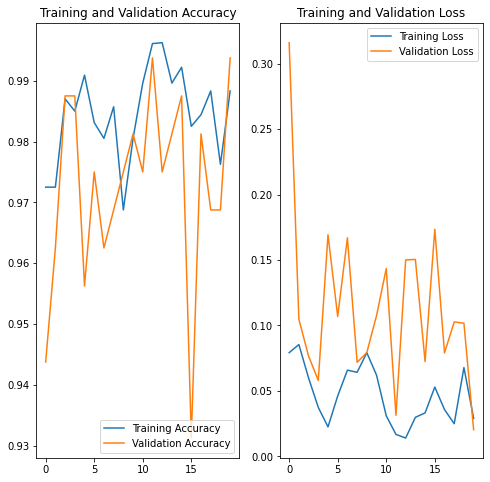

In [ ]:
# Plot accuracy & loss model dari train dan val

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
scissors


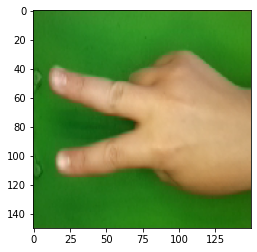

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')
